In [76]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import dotenv_values
import seaborn as sns
config = dotenv_values(".env")

cid = config["CLIENT_ID"]
secret = config["CLIENT_SECRET"]

auth_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [39]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
#spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

results = sp.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Young Heart
Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


In [43]:
track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)

In [46]:
track_results['tracks']['items']

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/64H8UqGLbJFHwKtGxiV8OP'},
     'href': 'https://api.spotify.com/v1/artists/64H8UqGLbJFHwKtGxiV8OP',
     'id': '64H8UqGLbJFHwKtGxiV8OP',
     'name': 'THE ANXIETY',
     'type': 'artist',
     'uri': 'spotify:artist:64H8UqGLbJFHwKtGxiV8OP'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/3rWZHrfrsPBxVy692yAIxF'},
     'href': 'https://api.spotify.com/v1/artists/3rWZHrfrsPBxVy692yAIxF',
     'id': '3rWZHrfrsPBxVy692yAIxF',
     'name': 'WILLOW',
     'type': 'artist',
     'uri': 'spotify:artist:3rWZHrfrsPBxVy692yAIxF'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/1xoxekeb8jUVHKJB7m6bfg'},
     'href': 'https://api.spotify.com/v1/artists/1xoxekeb8jUVHKJB7m6bfg',
     'id': '1xoxekeb8jUVHKJB7m6bfg',
     'name': 'Tyler Cole',
     'type': 'artist',
     'uri': 'spotify:artist:1xoxekeb8jUVHKJB7m6bfg'}],
   'available_markets': ['AD',
 

In [260]:
queries = ['h%', 'x%', '%f%', '%w%', 'p%', '%e%', 'i%', '%pb%', '%v', '%r%', '%4%', 'k%']

In [448]:
artist_name = []
track_name = []
popularity = []
track_id = []
    
start = timeit.default_timer()

while len(track_id) < 1000:
    r = randint(0, 700)
    q = random.choice(queries)
    #print(q)
    track_results = sp.search(q='{}'.format(q), type='track', market='US', limit=50, offset=r)
    #print(track_results)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
    #print(len(track_id))
    
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 8.960887999999613


In [449]:
print('number of elements in the track_id list:', len(track_id))

number of elements in the track_id list: 1000


In [450]:
#import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,Young Thug,pick up the phone,20dP2DaMHIAmwWAbp7peSr,71
1,MUNA,Silk Chiffon (feat. Phoebe Bridgers),0BLY78hYpsH9NqP6X0N8CX,71
2,Radiohead,Creep,70LcF31zb1H0PyJoS1Sx1r,82
3,Phantogram,Black Out Days - Future Islands Remix,3kxkjirben9RVm9NqYa6rm,80
4,Pop Smoke,Got It On Me,25zlnOAzbVoOzIeXSvQFf1,77


In [451]:
grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

106

In [452]:
df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

In [453]:
## Get audio features
# again measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 1.5795925419988635


In [454]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (877, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.711,0.739,7,-3.804,0,0.1290,0.11400,0.000000,0.226,0.430,136.919,audio_features,20dP2DaMHIAmwWAbp7peSr,spotify:track:20dP2DaMHIAmwWAbp7peSr,https://api.spotify.com/v1/tracks/20dP2DaMHIAm...,https://api.spotify.com/v1/audio-analysis/20dP...,252256,4
1,0.622,0.736,8,-6.219,1,0.0444,0.01560,0.000000,0.112,0.432,97.006,audio_features,0BLY78hYpsH9NqP6X0N8CX,spotify:track:0BLY78hYpsH9NqP6X0N8CX,https://api.spotify.com/v1/tracks/0BLY78hYpsH9...,https://api.spotify.com/v1/audio-analysis/0BLY...,206587,4
2,0.515,0.430,7,-9.935,1,0.0372,0.00970,0.000133,0.129,0.104,91.844,audio_features,70LcF31zb1H0PyJoS1Sx1r,spotify:track:70LcF31zb1H0PyJoS1Sx1r,https://api.spotify.com/v1/tracks/70LcF31zb1H0...,https://api.spotify.com/v1/audio-analysis/70Lc...,238640,4
3,0.477,0.483,4,-9.413,0,0.0364,0.00270,0.783000,0.156,0.123,170.026,audio_features,3kxkjirben9RVm9NqYa6rm,spotify:track:3kxkjirben9RVm9NqYa6rm,https://api.spotify.com/v1/tracks/3kxkjirben9R...,https://api.spotify.com/v1/audio-analysis/3kxk...,248347,4
4,0.688,0.647,2,-7.258,1,0.1900,0.00815,0.000017,0.095,0.195,88.834,audio_features,25zlnOAzbVoOzIeXSvQFf1,spotify:track:25zlnOAzbVoOzIeXSvQFf1,https://api.spotify.com/v1/tracks/25zlnOAzbVoO...,https://api.spotify.com/v1/audio-analysis/25zl...,164580,4


In [398]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      802 non-null    float64
 1   energy            802 non-null    float64
 2   key               802 non-null    int64  
 3   loudness          802 non-null    float64
 4   mode              802 non-null    int64  
 5   speechiness       802 non-null    float64
 6   acousticness      802 non-null    float64
 7   instrumentalness  802 non-null    float64
 8   liveness          802 non-null    float64
 9   valence           802 non-null    float64
 10  tempo             802 non-null    float64
 11  type              802 non-null    object 
 12  id                802 non-null    object 
 13  uri               802 non-null    object 
 14  track_href        802 non-null    object 
 15  analysis_url      802 non-null    object 
 16  duration_ms       802 non-null    int64  
 1

In [455]:
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

df_audio_features.shape

(877, 14)

In [456]:
# merge both dataframes
# the 'inner' method will make sure that we only keep track IDs present in both datasets
df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
df.head()

Shape of the dataset: (877, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Young Thug,pick up the phone,20dP2DaMHIAmwWAbp7peSr,71,0.711,0.739,7,-3.804,0,0.1290,0.11400,0.000000,0.226,0.430,136.919,252256,4
1,MUNA,Silk Chiffon (feat. Phoebe Bridgers),0BLY78hYpsH9NqP6X0N8CX,71,0.622,0.736,8,-6.219,1,0.0444,0.01560,0.000000,0.112,0.432,97.006,206587,4
2,Radiohead,Creep,70LcF31zb1H0PyJoS1Sx1r,82,0.515,0.430,7,-9.935,1,0.0372,0.00970,0.000133,0.129,0.104,91.844,238640,4
3,Phantogram,Black Out Days - Future Islands Remix,3kxkjirben9RVm9NqYa6rm,80,0.477,0.483,4,-9.413,0,0.0364,0.00270,0.783000,0.156,0.123,170.026,248347,4
4,Pop Smoke,Got It On Me,25zlnOAzbVoOzIeXSvQFf1,77,0.688,0.647,2,-7.258,1,0.1900,0.00815,0.000017,0.095,0.195,88.834,164580,4


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 801
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       802 non-null    object 
 1   track_name        802 non-null    object 
 2   track_id          802 non-null    object 
 3   popularity        802 non-null    int64  
 4   danceability      802 non-null    float64
 5   energy            802 non-null    float64
 6   key               802 non-null    int64  
 7   loudness          802 non-null    float64
 8   mode              802 non-null    int64  
 9   speechiness       802 non-null    float64
 10  acousticness      802 non-null    float64
 11  instrumentalness  802 non-null    float64
 12  liveness          802 non-null    float64
 13  valence           802 non-null    float64
 14  tempo             802 non-null    float64
 15  duration_ms       802 non-null    int64  
 16  time_signature    802 non-null    int64  
dt

In [329]:
#out_df = pd.DataFrame(columns = df.columns)
#out_df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [457]:
out_df = out_df.append(df)
out_df.tail()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
872,Lil Tjay,Zoo York (feat. Fivio Foreign & Pop Smoke),3Ddny34bFoYBb8dIGq5lwp,69,0.565,0.569,6,-6.084,0,0.3790,0.0352,0.000009,0.1060,0.303,92.466,214825,5
873,Tory Lanez,And This is Just The Intro,4sMmYKC0ot3GTbl2RzHw7T,66,0.530,0.517,5,-9.253,0,0.3990,0.3870,0.000000,0.1760,0.381,137.554,326813,4
874,Isaiah Rashad,Wat's Wrong (feat. Zacari & Kendrick Lamar),2RPbEp0DyBVlkRvvYKopO7,66,0.706,0.688,1,-6.357,1,0.2690,0.1510,0.000000,0.4660,0.313,125.966,330783,4
875,Brooks & Dunn,My Maria,09qzRI951OVkXGCc33gzcT,68,0.673,0.842,3,-4.627,1,0.0366,0.0600,0.000257,0.1780,0.898,125.570,208107,4
876,Billie Eilish,Bored,3NSZE3XcRsZdTxE1GWkYGi,0,0.612,0.318,7,-12.695,1,0.0478,0.8980,0.002390,0.0795,0.112,119.968,180933,4


In [460]:
out_df.shape

(4099, 17)

In [349]:
#out_df = out_df.reset_index()

In [459]:
out_df.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

In [465]:
out_df.reset_index(drop=True)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Juice WRLD,Flaws And Sins,2BSbCCbaSCzkOEZa6N5901,72,0.709,0.662,8,-4.550,1,0.0766,0.00966,0.000000,0.1080,0.439,150.046,218349,4
1,James Arthur,Say You Won't Let Go,5uCax9HTNlzGybIStD3vDh,84,0.358,0.557,10,-7.398,1,0.0590,0.69500,0.000000,0.0902,0.494,85.043,211467,4
2,42 Dugg,4 Da Gang (with Roddy Ricch),1mAey8kEPmDM2icL56kS9d,76,0.870,0.561,7,-10.388,1,0.1860,0.01240,0.000000,0.1030,0.691,100.458,156368,4
3,Jimmie Allen,Freedom Was A Highway,3J5jotqUAjU479WhAiNkpU,70,0.563,0.847,1,-4.493,1,0.0468,0.08910,0.000000,0.1210,0.666,96.060,212720,4
4,Gorillaz,She's My Collar (feat. Kali Uchis),3lIxtCaROdRDuTnNBDm3n2,76,0.726,0.815,11,-5.886,1,0.0313,0.00799,0.081000,0.1120,0.462,140.158,209560,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,5ive,Me and My Brother,0AZYhsESBrtRq88nxq6GMZ,69,0.766,0.535,0,-7.607,0,0.0691,0.59900,0.000000,0.1000,0.389,130.053,212532,4
4095,Lil Tjay,Zoo York (feat. Fivio Foreign & Pop Smoke),3Ddny34bFoYBb8dIGq5lwp,69,0.565,0.569,6,-6.084,0,0.3790,0.03520,0.000009,0.1060,0.303,92.466,214825,5
4096,Tory Lanez,And This is Just The Intro,4sMmYKC0ot3GTbl2RzHw7T,66,0.530,0.517,5,-9.253,0,0.3990,0.38700,0.000000,0.1760,0.381,137.554,326813,4
4097,Isaiah Rashad,Wat's Wrong (feat. Zacari & Kendrick Lamar),2RPbEp0DyBVlkRvvYKopO7,66,0.706,0.688,1,-6.357,1,0.2690,0.15100,0.000000,0.4660,0.313,125.966,330783,4


<AxesSubplot:xlabel='popularity', ylabel='Count'>

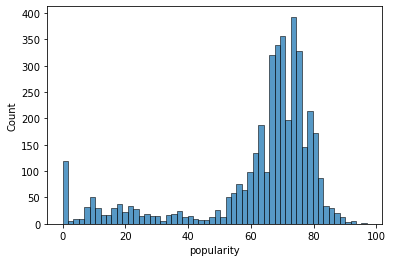

In [461]:
sns.histplot(out_df['popularity'])

In [466]:
with open('spotify_add_data.csv', 'w') as f:
    out_df.to_csv(f, header= True, index=False)

In [464]:
## Combine with scraped data

in_df = pd.read_csv('/Users/joycetagal/Github/metis/reg/spotify_full_data.csv')
in_df.head()

,id,popularity,duration,loudness,tempo,tempo_confidence,time_signature,time_signature_confidence,key,key_confidence,...,danceability,energy,instrumentalness,liveness,speechiness,valence,title,artist,song id,weekly chart date
0,67BtfxlNbhBmCDR2L2l8qd,93,137.87573,-6.682,178.818,0.113,4.0,1.000,8.0,0.586,...,0.610,0.508,0.000000,0.3840,0.1520,0.7580,MONTERO (Call Me By Your Name),Lil Nas X,67BtfxlNbhBmCDR2L2l8qd,2021-09-10 - 2021-09-17
1,1lNEXDlxVhsWaq2DLBUDgC,73,167.12000,-6.484,80.043,0.455,4.0,1.000,1.0,0.335,...,0.654,0.713,0.000000,0.0837,0.0846,0.6940,simple times,Kacey Musgraves,1lNEXDlxVhsWaq2DLBUDgC,2021-09-10 - 2021-09-17
2,5ScbulRnixQ2XAdvrPMFjz,81,229.30354,-6.770,177.693,0.119,3.0,1.000,8.0,0.505,...,0.320,0.466,0.000000,0.1330,0.0374,0.3380,Get Along Better,"Drake, Ty Dolla $ign",5ScbulRnixQ2XAdvrPMFjz,2021-09-10 - 2021-09-17
3,15hJmqqEtASVXl6sM7i4UF,75,270.67078,-5.620,130.027,0.225,4.0,0.896,10.0,0.435,...,0.615,0.600,0.000002,0.2830,0.2700,0.0661,trademark usa,BaKeem,15hJmqqEtASVXl6sM7i4UF,2021-09-10 - 2021-09-17
4,3RkNXZvOSMMElmmXztDc94,80,245.13103,-9.840,87.073,0.262,4.0,0.979,4.0,0.742,...,0.783,0.416,0.000000,0.1030,0.1350,0.1650,F*****g Fans,Drake,3RkNXZvOSMMElmmXztDc94,2021-09-10 - 2021-09-17


In [478]:
in_df.drop(columns=['mode_confidence'], inplace=True)

In [479]:
in_df.shape

(1277, 17)

In [495]:
out_df.shape

(4099, 17)

In [487]:
in_df.rename(columns={'id': 'track_id', 'artist': 'artist_name', 'title': 'track_name'}, inplace=True)

In [489]:
in_df_copy = in_df[['artist_name', 'track_name', 'track_id', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration']]

In [481]:
out_df['duration'] = out_df['duration_ms']/1000

In [483]:
out_df.drop(columns=['duration_ms'], inplace=True)

In [491]:
final_df = pd.concat([in_df_copy, out_df])

In [494]:
final_df.reset_index(drop=True)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,Lil Nas X,MONTERO (Call Me By Your Name),67BtfxlNbhBmCDR2L2l8qd,93,0.610,0.508,8.0,-6.682,0.0,0.1520,0.29700,0.000000,0.3840,0.7580,178.818,4.0,137.87573
1,Kacey Musgraves,simple times,1lNEXDlxVhsWaq2DLBUDgC,73,0.654,0.713,1.0,-6.484,0.0,0.0846,0.62800,0.000000,0.0837,0.6940,80.043,4.0,167.12
2,"Drake, Ty Dolla $ign",Get Along Better,5ScbulRnixQ2XAdvrPMFjz,81,0.320,0.466,8.0,-6.770,1.0,0.0374,0.00645,0.000000,0.1330,0.3380,177.693,3.0,229.30354
3,BaKeem,trademark usa,15hJmqqEtASVXl6sM7i4UF,75,0.615,0.600,10.0,-5.620,1.0,0.2700,0.10700,0.000002,0.2830,0.0661,130.027,4.0,270.67078
4,Drake,F*****g Fans,3RkNXZvOSMMElmmXztDc94,80,0.783,0.416,4.0,-9.840,0.0,0.1350,0.21300,0.000000,0.1030,0.1650,87.073,4.0,245.13103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,5ive,Me and My Brother,0AZYhsESBrtRq88nxq6GMZ,69,0.766,0.535,0,-7.607,0,0.0691,0.59900,0.000000,0.1000,0.3890,130.053,4,212.532
5372,Lil Tjay,Zoo York (feat. Fivio Foreign & Pop Smoke),3Ddny34bFoYBb8dIGq5lwp,69,0.565,0.569,6,-6.084,0,0.3790,0.03520,0.000009,0.1060,0.3030,92.466,5,214.825
5373,Tory Lanez,And This is Just The Intro,4sMmYKC0ot3GTbl2RzHw7T,66,0.530,0.517,5,-9.253,0,0.3990,0.38700,0.000000,0.1760,0.3810,137.554,4,326.813
5374,Isaiah Rashad,Wat's Wrong (feat. Zacari & Kendrick Lamar),2RPbEp0DyBVlkRvvYKopO7,66,0.706,0.688,1,-6.357,1,0.2690,0.15100,0.000000,0.4660,0.3130,125.966,4,330.783


In [497]:
final_df.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

In [498]:
final_df.shape

(4839, 17)

In [506]:
final_df.dtypes

artist_name          object
track_name           object
track_id             object
popularity            int64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
duration            float64
dtype: object

In [505]:
final_df[['popularity', 'key', 'mode', 'time_signature', 'duration']] = final_df[['popularity', 'key', 'mode', 'time_signature', 'duration']].apply(pd.to_numeric, errors='coerce')

<AxesSubplot:xlabel='popularity', ylabel='Count'>

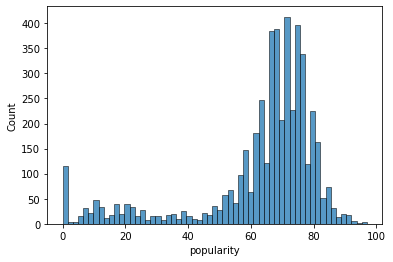

In [507]:
sns.histplot(final_df['popularity'])

In [508]:
with open('spotify_final_final_data.csv', 'w') as f:
    final_df.to_csv(f, header= True, index=False)

In [614]:
r = sp.artists(['7jVv8c5Fj3E9VhNjxT4snq','70kkdajctXSbqSMJbQO424'])

In [619]:
r['artists'][0]['genres']

['lgbtq+ hip hop', 'pop']

In [601]:
track_ids = []
album_ids = []
results = sp.tracks(tracks=['1lNEXDlxVhsWaq2DLBUDgC', '15hJmqqEtASVXl6sM7i4UF'])
#for i, t in enumerate(results['tracks']):
#    track_ids.append(t['id'])
#    album_ids.append(t['album']['id'])

In [611]:
results['tracks'][0]['artists'][0]['id']

'0CEFCo8288kQU7mJi25s6E'

In [ ]:
r['tracks'][0]['album']['id']

In [595]:
a = sp.albums(albums=['2Hjcfw8zHN4dJDZJGOzLd6','6y9LbrjY2TpaLvtbE7FTkc'])

In [600]:
a['albums'][1]['genres']

[]

In [608]:
## Get audio features
# again measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
track_ids = []
album_ids = []
artist_ids = []
batchsize = 50
#None_counter = 0

for i in range(0,len(final_df['track_id']),batchsize):
    batch = list(final_df['track_id'][i:i+batchsize])
    #print(batch)
    results = sp.tracks(tracks=batch)
    for i, t in enumerate(results['tracks']):
        track_ids.append(t['id'])
        album_ids.append(t['album']['id'])
        artist_ids.append(t['artists'][0]['id'])
        #album_ids.append(t['album']['id'])
    #print(track_ids)
    
#print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Time to run this code (in seconds): 19.226152291998005


In [609]:
artist_ids

['7jVv8c5Fj3E9VhNjxT4snq',
 '70kkdajctXSbqSMJbQO424',
 '3TVXtAsR1Inumwj472S9r4',
 '5SXuuuRpukkTvsLuUknva1',
 '3TVXtAsR1Inumwj472S9r4',
 '4yvcSjfu4PC0CYQyLy4wSq',
 '70kkdajctXSbqSMJbQO424',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '2kucQ9jQwuD8jWdtR9Ef38',
 '70kkdajctXSbqSMJbQO424',
 '70kkdajctXSbqSMJbQO424',
 '04gDigrS5kc9YWfZHwBETP',
 '2gBjLmx6zQnFGQJCAQpRgw',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5SXuuuRpukkTvsLuUknva1',
 '5SXuuuRpukkTvsLuUknva1',
 '3TVXtAsR1Inumwj472S9r4',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '20sxb77xiYeusSH8cVdatc',
 '5f7VJjfbwm532GiveGC0ZK',
 '1vyhD5VmyZ7KMfW5gqLgo5',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '0lAWpj5szCSwM4rUMHYmrr',
 '5SXuuuRpukkTvsLuUknva1',
 '70kkdajctXSbqSMJbQO424',
 '4nDoRrQiYLoBzwC5BhVJzF',
 '5SXuuuRpukkTvsLuUknva1',
 '7sKxqpSqbIzphAKAhrqvlf',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '5K4W6rqBFWDnAN6FQUkS6x',
 

In [610]:
df_albums = pd.DataFrame({'track_id':track_ids,'album_id':album_ids, 'artist_id':artist_ids})
print(df_albums.shape)
df_albums.head()

(4839, 3)


,track_id,album_id,artist_id
0,67BtfxlNbhBmCDR2L2l8qd,2Hjcfw8zHN4dJDZJGOzLd6,7jVv8c5Fj3E9VhNjxT4snq
1,1lNEXDlxVhsWaq2DLBUDgC,6y9LbrjY2TpaLvtbE7FTkc,70kkdajctXSbqSMJbQO424
2,5ScbulRnixQ2XAdvrPMFjz,3SpBlxme9WbeQdI9kx7KAV,3TVXtAsR1Inumwj472S9r4
3,15hJmqqEtASVXl6sM7i4UF,3r46DPIQeBQbjvjjV5mXGg,5SXuuuRpukkTvsLuUknva1
4,3RkNXZvOSMMElmmXztDc94,3SpBlxme9WbeQdI9kx7KAV,3TVXtAsR1Inumwj472S9r4


In [623]:
## Get artist genres
# again measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
album_genres = []
batchsize = 50

for i in range(0,len(df_albums['artist_id']),batchsize):
    batch = list(df_albums['artist_id'][i:i+batchsize])
    #print(batch)
    results = sp.artists(batch)
    for i, t in enumerate(results['artists']):
        album_genres.append(t['genres'])
        #album_ids.append(t['album']['id'])
    #print(track_ids)
    
#print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Time to run this code (in seconds): 12.551610666996567


In [624]:
album_genres

[['lgbtq+ hip hop', 'pop'],
 ['contemporary country', 'country dawn', 'pop', 'texas country'],
 ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap'],
 ['hip hop', 'rap', 'trap'],
 ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap'],
 ['gauze pop', 'indietronica', 'shiver pop'],
 ['contemporary country', 'country dawn', 'pop', 'texas country'],
 ['chicago rap', 'rap'],
 ['contemporary country', 'country pop'],
 ['contemporary country', 'country dawn', 'pop', 'texas country'],
 ['contemporary country', 'country dawn', 'pop', 'texas country'],
 ['pop', 'pop rock'],
 ['dance pop',
  'hip hop',
  'pop rap',
  'rap',
  'southern hip hop',
  'st louis rap',
  'urban contemporary'],
 ['chicago rap', 'rap'],
 ['chicago rap', 'rap'],
 ['hip hop', 'rap', 'trap'],
 ['hip hop', 'rap', 'trap'],
 ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap'],
 ['chicago rap', 'rap'],
 ['hip hop', 'philly rap', 'pop rap', 'rap', 'southern hip hop', 'trap'],
 [

In [625]:
len(album_genres)

4839

In [626]:
len(df_albums)

4839

In [627]:
df_albums['genres'] = album_genres

In [630]:
df_albums_copy = df_albums.drop(columns=['album_id', 'artist_id'])

In [629]:
final_df.shape

(4839, 17)

In [631]:
final_df2 = final_df.merge(df_albums_copy, on='track_id', how='inner')

In [632]:
final_df2.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,genres
0,Lil Nas X,MONTERO (Call Me By Your Name),67BtfxlNbhBmCDR2L2l8qd,93,0.610,0.508,8.0,-6.682,0.0,0.1520,0.29700,0.000000,0.3840,0.7580,178.818,4.0,137.87573,"[lgbtq+ hip hop, pop]"
1,Kacey Musgraves,simple times,1lNEXDlxVhsWaq2DLBUDgC,73,0.654,0.713,1.0,-6.484,0.0,0.0846,0.62800,0.000000,0.0837,0.6940,80.043,4.0,167.12000,"[contemporary country, country dawn, pop, texa..."
2,"Drake, Ty Dolla $ign",Get Along Better,5ScbulRnixQ2XAdvrPMFjz,81,0.320,0.466,8.0,-6.770,1.0,0.0374,0.00645,0.000000,0.1330,0.3380,177.693,3.0,229.30354,"[canadian hip hop, canadian pop, hip hop, rap,..."
3,BaKeem,trademark usa,15hJmqqEtASVXl6sM7i4UF,75,0.615,0.600,10.0,-5.620,1.0,0.2700,0.10700,0.000002,0.2830,0.0661,130.027,4.0,270.67078,"[hip hop, rap, trap]"
4,BaKeem,trademark usa,15hJmqqEtASVXl6sM7i4UF,75,0.615,0.600,10.0,-5.620,1.0,0.2700,0.10700,0.000002,0.2830,0.0661,130.027,4.0,270.67078,"[hip hop, rap, trap]"


In [633]:
with open('spotify_final_final_final_data.csv', 'w') as f:
    final_df2.to_csv(f, header= True, index=False)